<a href="https://colab.research.google.com/github/beolawork-art/HiCi---Africa-Food-Export.ipynb/blob/main/HiCi_Africa_Food_Export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('HiCi - Africa Food Export.csv', header=4)

In [8]:
print(df.head())

   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN   

                              Product category       Year Notification type  \
0  meat and meat products (other than poultry)   5/8/1999       information   
1  meat and meat products (other than poultry)  24/8/1999       information   
2  meat and meat products (other than poultry)  24/9/1999       information   
3  meat and meat products (other than poultry)  11/6/2001       information   
4  meat and meat products (other than poultry)  21/6/2001       information   

  Risk Notified by           Action taken Distribution status Risk decision  \
0  NaN      Norway  import not authorised              

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           0 non-null      float64
 1   Unnamed: 1           0 non-null      float64
 2   Unnamed: 2           0 non-null      float64
 3   Unnamed: 3           0 non-null      float64
 4   Unnamed: 4           0 non-null      float64
 5   Product category     513 non-null    object 
 6   Year                 513 non-null    object 
 7   Notification type    513 non-null    object 
 8   Risk                 466 non-null    object 
 9   Notified by          513 non-null    object 
 10  Action taken         475 non-null    object 
 11  Distribution status  446 non-null    object 
 12  Risk decision        513 non-null    object 
 13  Country of origin    513 non-null    object 
dtypes: float64(5), object(9)
memory usage: 56.2+ KB
None


In [10]:
# 2. Drop the completely empty 'Unnamed' columns
cols_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df_clean = df.drop(columns=cols_to_drop)

# 3. Clean Column Names: Remove spaces from the edges of column names (e.g., ' Risk ' becomes 'Risk')
df_clean.columns = df_clean.columns.str.strip()

# 4. Clean Data Values: Remove spaces from the edges of every single text entry in the data.
text_cols = df_clean.select_dtypes(include=['object']).columns

for col in text_cols:
    # We turn it to string first, just in case of any weird values
    df_clean[col] = df_clean[col].astype(str).str.strip()

# Rename 'Year' to 'Date of Notification' for clarity
df_clean = df_clean.rename(columns={'Year': 'Date of Notification'})

print("\n--- Data Cleaned and Ready ---")
print(df_clean.head())


--- Data Cleaned and Ready ---
                              Product category Date of Notification  \
0  meat and meat products (other than poultry)             5/8/1999   
1  meat and meat products (other than poultry)            24/8/1999   
2  meat and meat products (other than poultry)            24/9/1999   
3  meat and meat products (other than poultry)            11/6/2001   
4  meat and meat products (other than poultry)            21/6/2001   

  Notification type Risk Notified by           Action taken  \
0       information  nan      Norway  import not authorised   
1       information  nan      Norway  import not authorised   
2       information  nan      Norway  import not authorised   
3       information  nan      Norway  import not authorised   
4       information  nan      Norway  import not authorised   

  Distribution status Risk decision Country of origin  
0                 nan     undecided          Botswana  
1                 nan     undecided          Botsw

In [13]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product category      513 non-null    object
 1   Date of Notification  513 non-null    object
 2   Notification type     513 non-null    object
 3   Risk                  513 non-null    object
 4   Notified by           513 non-null    object
 5   Action taken          513 non-null    object
 6   Distribution status   513 non-null    object
 7   Risk decision         513 non-null    object
 8   Country of origin     513 non-null    object
dtypes: object(9)
memory usage: 36.2+ KB
None


In [14]:
# 5. Filter the DataFrame for 'border rejection' notifications
df_rejection = df_clean[df_clean['Notification type'] == 'border rejection'].copy()

print(f"\n--- Filtered Rejection Records: {len(df_rejection)} total ---")


--- Filtered Rejection Records: 339 total ---


In [16]:
# The final, filtered spreadsheet we analyzed is named df_rejection
# We tell Python to save it as a new file named 'HiCi_Cleaned_Rejections.csv'

# index=False tells Python NOT to include the automatic numbering (0, 1, 2, 3...)
# in the file, keeping it neat.
df_rejection.to_csv('HiCi_Cleaned_Rejections.csv', index=False)

In [15]:
# --- ANALYSIS TO ANSWER THE QUESTIONS (a, b, d, e) ---

# a. EU member country that reports the highest number of food rejection
q_a = df_rejection['Notified by'].value_counts().nlargest(5)
print("\n--- a. Top 5 Reporting EU Countries ---")
print(q_a)

# b. The most rejected food (Product category)
q_b = df_rejection['Product category'].value_counts().nlargest(5)
print("\n--- b. Top 5 Most Rejected Food Products ---")
print(q_b)
most_rejected_food = q_b.index[0] # Store the name of the top product

# c. The country of origin of the most rejected food? (Using the result from b)
q_c_df = df_rejection[df_rejection['Product category'] == most_rejected_food]
q_c = q_c_df['Country of origin'].value_counts().nlargest(1)
print(f"\n--- c. Origin for Most Rejected Food ('{most_rejected_food}') ---")
print(q_c)

# d. The most action taken against food exported to the EU?
q_d = df_rejection['Action taken'].value_counts().nlargest(5)
print("\n--- d. Top 5 Actions Taken Against Rejected Food ---")
print(q_d)

# e. The most reported origin (country) food export?
q_e = df_rejection['Country of origin'].value_counts().nlargest(5)
print("\n--- e. Top 5 Most Reported Origin Countries ---")
print(q_e)

# --- PIVOT TABLE CREATION ---

# Create the pivot table of Product vs. Notifying EU Country
pivot_table = pd.crosstab(
    df_rejection['Product category'],
    df_rejection['Notified by'],
    normalize=False # Use absolute counts
)

# Sum the rejections for each product and sort
pivot_table['Total Rejections'] = pivot_table.sum(axis=1)
pivot_table_top10 = pivot_table.sort_values(by='Total Rejections', ascending=False).head(10)

# Save the pivot table to a new file
pivot_table_top10.to_csv('top_10_rejected_products_pivot.csv')
print("\n--- Pivot Table saved to: top_10_rejected_products_pivot.csv ---")


--- a. Top 5 Reporting EU Countries ---
Notified by
Greece         223
Netherlands     38
Poland          30
Germany         23
Italy           12
Name: count, dtype: int64

--- b. Top 5 Most Rejected Food Products ---
Product category
nuts, nut products and seeds                    318
herbs and spices                                  6
fish and fish products                            6
meat and meat products (other than poultry)       4
cocoa and cocoa preparations, coffee and tea      1
Name: count, dtype: int64

--- c. Origin for Most Rejected Food ('nuts, nut products and seeds') ---
Country of origin
Sudan    180
Name: count, dtype: int64

--- d. Top 5 Actions Taken Against Rejected Food ---
Action taken
re-dispatch                    96
physical/chemical treatment    79
import not authorised          78
official detention             44
nan                            25
Name: count, dtype: int64

--- e. Top 5 Most Reported Origin Countries ---
Country of origin
Sudan          

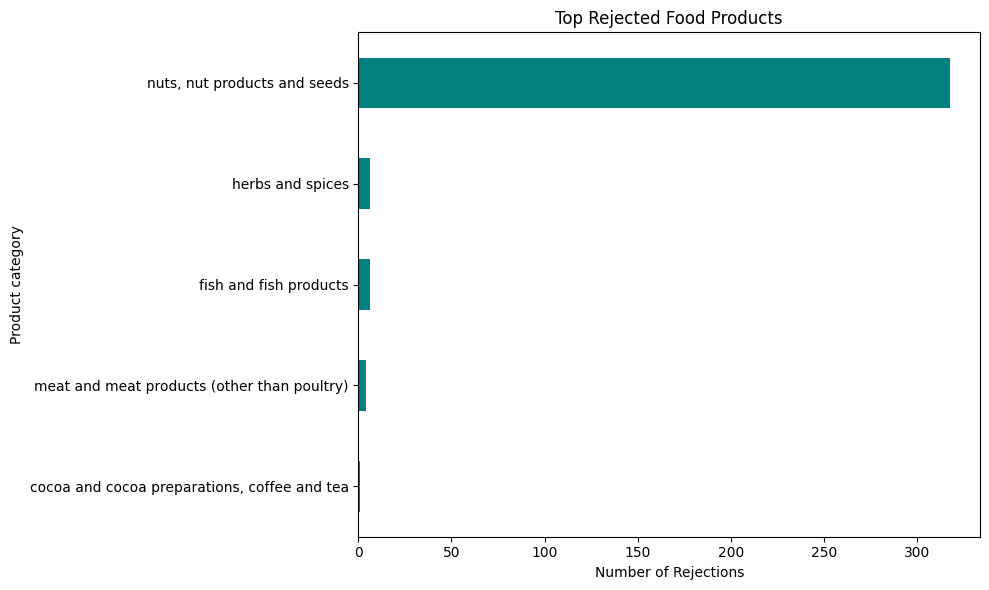

In [17]:
plt.figure(figsize=(10, 6))
q_b.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Top Rejected Food Products')
plt.xlabel('Number of Rejections')
plt.tight_layout()
plt.show() # Use plt.savefig('filename.png') to save it

**Comprehensive Report: EU Food Export Risk Assessment for HiCi Ltd**

1. **The Core Problem: Border Rejection**

Our analysis focused only on border rejection notifications, finding 339 total rejection events. This tells us exactly where HiCi Ltd's risks lie.

2. **Analysis of Determinants (The Five Questions)**

a. **EU Member Country Reporting the Highest Number of Rejection**

The biggest gatekeeper HiCi Ltd needs to worry about is Greece. They reported over five times more rejections than the next highest country, the Netherlands.

| EU Reporting Country | Number of Rejections |
| :--- | --- |
| Greece | 223 |
| Netherlands | 38 |
| Poland | 30 |
| Germany | 23 |
| Italy | 12 |

b. **The Most Rejected Food**

One product dominates the rejection statistics: nuts, nut products and seeds. This single product category accounts for over $90\%$ of all rejections in the data.

| Product Category | Number of Rejections |
| :--- | --- |
| nuts, nut products and seeds | 318 |
| herbs and spices | 6 |
| fish and fish products | 6 |

c. **The Country of Origin of the Most Rejected Food**
The country most linked to the rejection of 'nuts, nut products and seeds' is Sudan. This suggests a systemic issue with quality control in the supply chain originating from this region.

| Country of Origin | Rejections of 'nuts, nut products and seeds' |
| :--- | --- |
| Sudan | 180 |

d. **The Most Frequent Action Taken**

When a shipment is rejected, the most common action is to send it back. This means a complete loss of shipping cost and time.

| Action Taken | Count |
| :--- | --- |
| re-dispatch (Sent back) | 96 |
| physical/chemical treatment (Forced cleaning) | 79 |
| import not authorised (Banned) | 78 |
| official detention (Held by authorities) | 44 |

e. **The Most Reported Origin Country (Overall)**

Overall, Sudan is the most frequently reported country of origin in the rejection data, confirming it is the source of the majority of the risk.

| Country of Origin | Number of Rejections |
| :--- | --- |
| Sudan | 180 |
| Nigeria | 82 |
| Uganda | 29 |

3. **Pivot Table and Risk Assessment**

We can see the risk clearly when we cross-reference the problem product with the reporting countries.

| Product category | Greece | Netherlands | Poland |Germany | Total Rejections |
| :--- | :---: | :---: | :---: | :---: | --- |
| nuts, nut products and seeds | 222 | 38 | 30 | 21 |318 |
| fish and fish products | 0 | 0 | 0 | 2 | 6 |

**Which of the food products are at the highest risk?**
The product at the absolute highest risk is nuts, nut products and seeds.

**What are the risks?**

The risks are severe, mainly focusing on financial loss and operational delay:

1. **Total Loss of Investment:** The high number of **'import not authorised'** (78) and **'re-dispatch'** (96) actions mean HiCi Ltd could lose the entire shipment and all associated costs (shipping, handling).

2. **Forced Costly Intervention:** The **'physical/chemical treatment'** action (79) forces HiCi Ltd to pay for cleaning or processing at the border, adding significant, unexpected costs.


 **Strategic Focus Suggestion for HiCi Ltd Management**
To successfully penetrate the EU market and overcome these hurdles, HiCi Ltd should use a two-part strategy:

1. Immediate Action: AVOID High-Risk Products
HiCi Ltd should STOP exporting nuts, nut products and seeds until a comprehensive, third-party audit of the supply chain is completed. The overwhelming concentration of rejections in this category means it is an immediate liability.

2. Focus for Expansion: PROMOTE Low-Risk Products
To gain a foothold in the EU, HiCi Ltd should focus its current efforts on product categories that show no or very few rejections in the data. This allows HiCi Ltd to build credibility and establish reliable trade routes without incurring massive losses from border rejection.

If HiCi Ltd must export the nuts category, they must invest heavily in pre-shipment testing (especially for contaminants like aflatoxins, which are common in nuts) and secure certification demonstrating EU compliance before the product leaves Africa.